In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
#all the libraries
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [22]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [23]:
train_df.head(5)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [24]:

#train_df = train_df.drop('row_id',axis=1)
train_df.shape

(70128, 6)

In [25]:
# checking for null values
train_df.isna().any()

row_id      False
date        False
country     False
store       False
product     False
num_sold    False
dtype: bool

In [26]:

train_df.nunique()

row_id      70128
date         1461
country         6
store           2
product         4
num_sold      699
dtype: int64

In [27]:
train_df['country'].value_counts()

Poland     11688
Italy      11688
France     11688
Belgium    11688
Germany    11688
Spain      11688
Name: country, dtype: int64

In [28]:
#features
cat_features = ["country","store","product","row_id"]
dataframe = pd.get_dummies(train_df[cat_features])
dataframe
# train_df.merge(dataframe)
# train_df

,row_id,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,1,0,0,0,0,0,1,0,1,0,0,0
1,1,1,0,0,0,0,0,1,0,0,1,0,0
2,2,1,0,0,0,0,0,1,0,0,0,1,0
3,3,1,0,0,0,0,0,1,0,0,0,0,1
4,4,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,0,0,0,0,0,1,1,0,0,0,0,1
70124,70124,0,0,0,0,0,1,0,1,1,0,0,0
70125,70125,0,0,0,0,0,1,0,1,0,1,0,0
70126,70126,0,0,0,0,0,1,0,1,0,0,1,0


In [32]:

train_df =train_df.merge(dataframe) 
train_df

,row_id,date,country,store,product,num_sold,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,1,0,0,0,0,0,1,0,1,0,0,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,1,0,0,0,0,0,1,0,0,1,0,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,1,0,0,0,0,0,1,0,0,0,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,1,0,0,0,0,0,1,0,0,0,0,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,0,0,0,0,0,1,1,0,0,0,0,1
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,0,0,0,0,0,1,0,1,1,0,0,0
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,0,0,0,0,0,1,0,1,0,1,0,0
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,0,0,0,0,0,1,0,1,0,0,1,0


In [9]:
feature_df = train_df.groupby(['country','product','store']).sum()
feature_df.reset_index()
feature_df.count()

num_sold    48
dtype: int64

In [10]:
feature_df
train_df

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [11]:
px.bar(train_df.groupby('country')['num_sold'].sum())

In [12]:
px.bar(train_df.groupby('store')['num_sold'].sum())

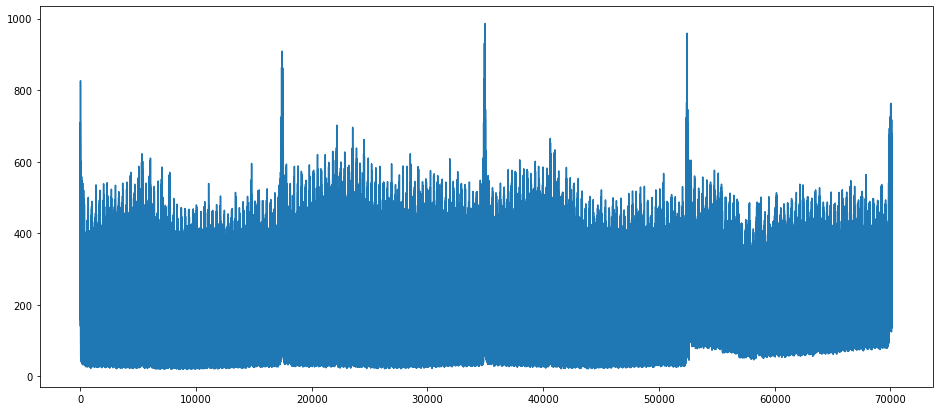

In [13]:
plt.figure(figsize=(16,7))
plt.plot(train_df['num_sold'])
plt.show()

In [33]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['week'] = train_df['date'].dt.isocalendar().week
train_df['week_day'] = train_df['date'].dt.weekday


In [34]:
# adding weekend
train_df['is_weekend'] = 0
train_df['is_weekend'].loc[train_df['week_day']>4] = 1
train_df

c:\Users\sakshi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,row_id,date,country,store,product,num_sold,country_Belgium,country_France,country_Germany,country_Italy,...,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,year,month,day,week,week_day,is_weekend
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,1,0,0,0,...,1,0,0,0,2017,1,1,52,6,1
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,1,0,0,0,...,0,1,0,0,2017,1,1,52,6,1
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,1,0,0,0,...,0,0,1,0,2017,1,1,52,6,1
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,1,0,0,0,...,0,0,0,1,2017,1,1,52,6,1
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,1,0,0,0,...,1,0,0,0,2017,1,1,52,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,0,0,0,0,...,0,0,0,1,2020,12,31,53,3,0
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,0,0,0,0,...,1,0,0,0,2020,12,31,53,3,0
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,0,0,0,0,...,0,1,0,0,2020,12,31,53,3,0
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,0,0,0,0,...,0,0,1,0,2020,12,31,53,3,0


In [35]:
#adding covid
train_df['pandemic'] = 0
train_df

,row_id,date,country,store,product,num_sold,country_Belgium,country_France,country_Germany,country_Italy,...,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,year,month,day,week,week_day,is_weekend,pandemic
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,1,0,0,0,...,0,0,0,2017,1,1,52,6,1,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,1,0,0,0,...,1,0,0,2017,1,1,52,6,1,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,1,0,0,0,...,0,1,0,2017,1,1,52,6,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,1,0,0,0,...,0,0,1,2017,1,1,52,6,1,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,1,0,0,0,...,0,0,0,2017,1,1,52,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,0,0,0,0,...,0,0,1,2020,12,31,53,3,0,0
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,0,0,0,0,...,0,0,0,2020,12,31,53,3,0,0
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,0,0,0,0,...,1,0,0,2020,12,31,53,3,0,0
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,0,0,0,0,...,0,1,0,2020,12,31,53,3,0,0


In [36]:
df = train_df.groupby(['year']).mean()
df

,row_id,num_sold,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,month,day,week,week_day,is_weekend,pandemic
year,,,,,,,,,,,,,,,,,,,,
2017,8759.5,177.634874,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.5,0.5,0.25,0.25,0.25,0.25,6.526027,15.720548,26.569863,3.008219,0.287671,0.0
2018,26279.5,195.515068,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.5,0.5,0.25,0.25,0.25,0.25,6.526027,15.720548,26.430137,2.991781,0.284932,0.0
2019,43799.5,184.525057,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.5,0.5,0.25,0.25,0.25,0.25,6.526027,15.720548,26.430137,2.994521,0.284932,0.0
2020,61343.5,219.444046,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.5,0.5,0.25,0.25,0.25,0.25,6.513661,15.756831,26.928962,2.997268,0.284153,0.0


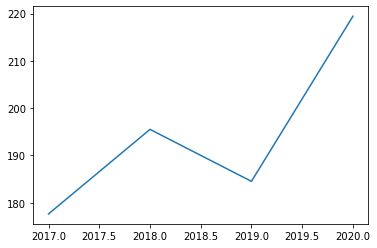

In [21]:
plt.plot(df['num_sold'])

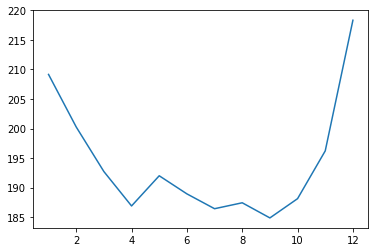

In [26]:

df1 = train_df.groupby(['month']).mean()
plt.plot(df1['num_sold'])
plt.show()

In [ ]:
train_df.set_index('date', inplace=True)
train_df.sort_index(inplace=True)
train_df

In [16]:
train_df['country'].value_counts()


Spain      11688
Belgium    11688
Italy      11688
Germany    11688
Poland     11688
France     11688
Name: country, dtype: int64

In [18]:
train_df.set_index('date', inplace=True)
train_df.sort_index(inplace=True)



In [37]:
train_df

,row_id,date,country,store,product,num_sold,country_Belgium,country_France,country_Germany,country_Italy,...,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,year,month,day,week,week_day,is_weekend,pandemic
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,1,0,0,0,...,0,0,0,2017,1,1,52,6,1,0
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,1,0,0,0,...,1,0,0,2017,1,1,52,6,1,0
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480,1,0,0,0,...,0,1,0,2017,1,1,52,6,1,0
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,1,0,0,0,...,0,0,1,2017,1,1,52,6,1,0
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240,1,0,0,0,...,0,0,0,2017,1,1,52,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,0,0,0,0,...,0,0,1,2020,12,31,53,3,0,0
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215,0,0,0,0,...,0,0,0,2020,12,31,53,3,0,0
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158,0,0,0,0,...,1,0,0,2020,12,31,53,3,0,0
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135,0,0,0,0,...,0,1,0,2020,12,31,53,3,0,0


In [23]:
train_df['pandemic'] = 0
# first day of lockdown 2020-03-19, we will assume that it is post pandemic after lockdown
train_df['pandemic'].loc[train_df.index > '2020-03-18'] = 1

c:\Users\sakshi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
X = train_df.drop(columns=['num_sold','row_id','country','store','product','date'])
y = train_df['num_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train

,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,year,month,day,week,week_day,is_weekend,pandemic
10275,1,0,0,0,0,0,1,0,0,0,0,1,2017,8,3,31,3,0,0
53154,0,0,1,0,0,0,1,0,0,0,1,0,2020,1,13,3,0,0,0
18521,0,0,0,0,0,1,1,0,0,1,0,0,2018,1,21,3,6,1,0
28759,1,0,0,0,0,0,0,1,0,0,0,1,2018,8,23,34,3,0,0
2987,0,1,0,0,0,0,1,0,0,0,0,1,2017,3,4,9,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0,0,0,0,0,1,1,0,0,0,1,0,2019,2,14,7,3,0,0
6265,0,0,0,1,0,0,1,0,0,1,0,0,2017,5,11,19,3,0,0
54886,0,0,1,0,0,0,0,1,0,0,1,0,2020,2,18,8,1,0,0
860,0,0,0,0,0,1,0,1,1,0,0,0,2017,1,18,3,2,0,0


In [41]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))

lasso.fit(X_train, y_train)
print(lasso.score(X_test,y_test))

y_pred = lr.predict(X_test)



0.7975466550907818
0.7975017066387462


In [42]:
cross_val_score(lr,X,y,cv=5)

array([0.80725386, 0.80008821, 0.80495615, 0.76892175, 0.63433175])